In [95]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tabula
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn import datasets, preprocessing, metrics

In [96]:
# Process csv-file
df = pd.read_csv('names.csv')

# Process webside 
url = 'https://www.ssa.gov/OACT/babynames/decades/names2010s.html'

# I found this webside for xml and json-files:
foundURL = 'https://catalog.data.gov/dataset/popular-baby-names'
# but it seems like there is no data in the file: see line 92 and 93

# Process xml-file
xml_url = 'https://data.cityofnewyork.us/api/views/25th-nujf/rows.xml?accessType=DOWNLOAD'
response = requests.get(xml_url)
xml_data = response.text
root = ET.fromstring(xml_data)
data = []
for row_element in root.findall('.//row'):
    row_data = {}
    
    for child_element in row_element:
        row_data[child_element.tag] = child_element.text

    data.append(row_data)

df_xml = pd.DataFrame(data)

# Process json-file
json_url = 'https://data.cityofnewyork.us/api/views/25th-nujf/rows.json?accessType=DOWNLOAD'
response = requests.get(json_url)
json_data = response.json()
dfjson = pd.json_normalize(json_data['data'])

# Process PDF-file:
pdf_path = 'babyNames-Boys.pdf'


In [5]:
# First file csv:
df.head

<bound method NDFrame.head of               Name Sex  Count  Year
0            Emily   F  25735  1997
1          Jessica   F  21044  1997
2           Ashley   F  20895  1997
3            Sarah   F  20712  1997
4           Hannah   F  20594  1997
...            ...  ..    ...   ...
2052776     Zymire   M      5  2008
2052777  Zyquarius   M      5  2008
2052778  Zyquavion   M      5  2008
2052779     Zyrell   M      5  2008
2052780      Zyren   M      5  2008

[2052781 rows x 4 columns]>

In [6]:
#I want to filter data from year, only show data from 2011 to 2019
condition = (df['Year'] >= 2011) & (df['Year'] <= 2019)

In [10]:
shortened_df = df[condition]

In [11]:
print(shortened_df)

             Name Sex  Count  Year
154474     Olivia   F  18534  2019
154475       Emma   F  17176  2019
154476        Ava   F  14515  2019
154477     Sophia   F  13769  2019
154478   Isabella   F  13360  2019
...           ...  ..    ...   ...
1620021     Zyere   M      5  2013
1620022     Zylar   M      5  2013
1620023    Zymari   M      5  2013
1620024    Zymeer   M      5  2013
1620025     Zyree   M      5  2013

[297395 rows x 4 columns]


In [23]:
#I want to filter data from sex
female_condition = shortened_df['Sex'] == 'F'
male_condition = shortened_df['Sex'] == 'M'

In [21]:
female_dataset = shortened_df[female_condition]
male_dataset = shortened_df[male_condition]

In [22]:
print("Female Dataset:")
print(female_dataset)

print("\nMale Dataset:")
print(male_dataset)

Female Dataset:
             Name Sex  Count  Year
154474     Olivia   F  18534  2019
154475       Emma   F  17176  2019
154476        Ava   F  14515  2019
154477     Sophia   F  13769  2019
154478   Isabella   F  13360  2019
...           ...  ..    ...   ...
1605967   Zyannah   F      5  2013
1605968    Zyliah   F      5  2013
1605969   Zyliyah   F      5  2013
1605970     Zymir   F      5  2013
1605971     Zyree   F      5  2013

[170028 rows x 4 columns]

Male Dataset:
            Name Sex  Count  Year
172446      Liam   M  20578  2019
172447      Noah   M  19121  2019
172448    Oliver   M  13940  2019
172449   William   M  13620  2019
172450    Elijah   M  13371  2019
...          ...  ..    ...   ...
1620021    Zyere   M      5  2013
1620022    Zylar   M      5  2013
1620023   Zymari   M      5  2013
1620024   Zymeer   M      5  2013
1620025    Zyree   M      5  2013

[127367 rows x 4 columns]


In [32]:
# Group the data
female_name_counts = female_dataset.groupby('Name')['Count'].sum()
male_name_counts = male_dataset.groupby('Name')['Count'].sum()

In [122]:
# Sort the data based on the total count in descending order
sorted_female_names = female_name_counts.sort_values(ascending=False)
sorted_male_names = male_name_counts.sort_values(ascending=False)

In [123]:
# Get top 200 names 
top_200_female_names = sorted_female_names.head(200)
top_200_male_names = sorted_male_names.head(200)

In [124]:
print("Top 200 Female Names with Total Count:")
print(top_200_female_names.reset_index())  # To get names as a seperate column

print("\nTop 200 Male Names with Total Count:")
print(top_200_male_names.reset_index())

Top 200 Female Names with Total Count:
          Name   Count
0         Emma  177482
1       Olivia  167325
2       Sophia  160305
3     Isabella  147412
4          Ava  140254
..         ...     ...
195     Esther   14648
196       Lila   14582
197  Genevieve   14424
198   Julianna   14422
199      Alana   14418

[200 rows x 2 columns]

Top 200 Male Names with Total Count:
        Name   Count
0       Noah  166613
1       Liam  162869
2      Mason  142869
3    William  142713
4      Jacob  140888
..       ...     ...
195     Jake   17958
196   Xander   17930
197     Sean   17763
198  Kenneth   17752
199   Zayden   17589

[200 rows x 2 columns]


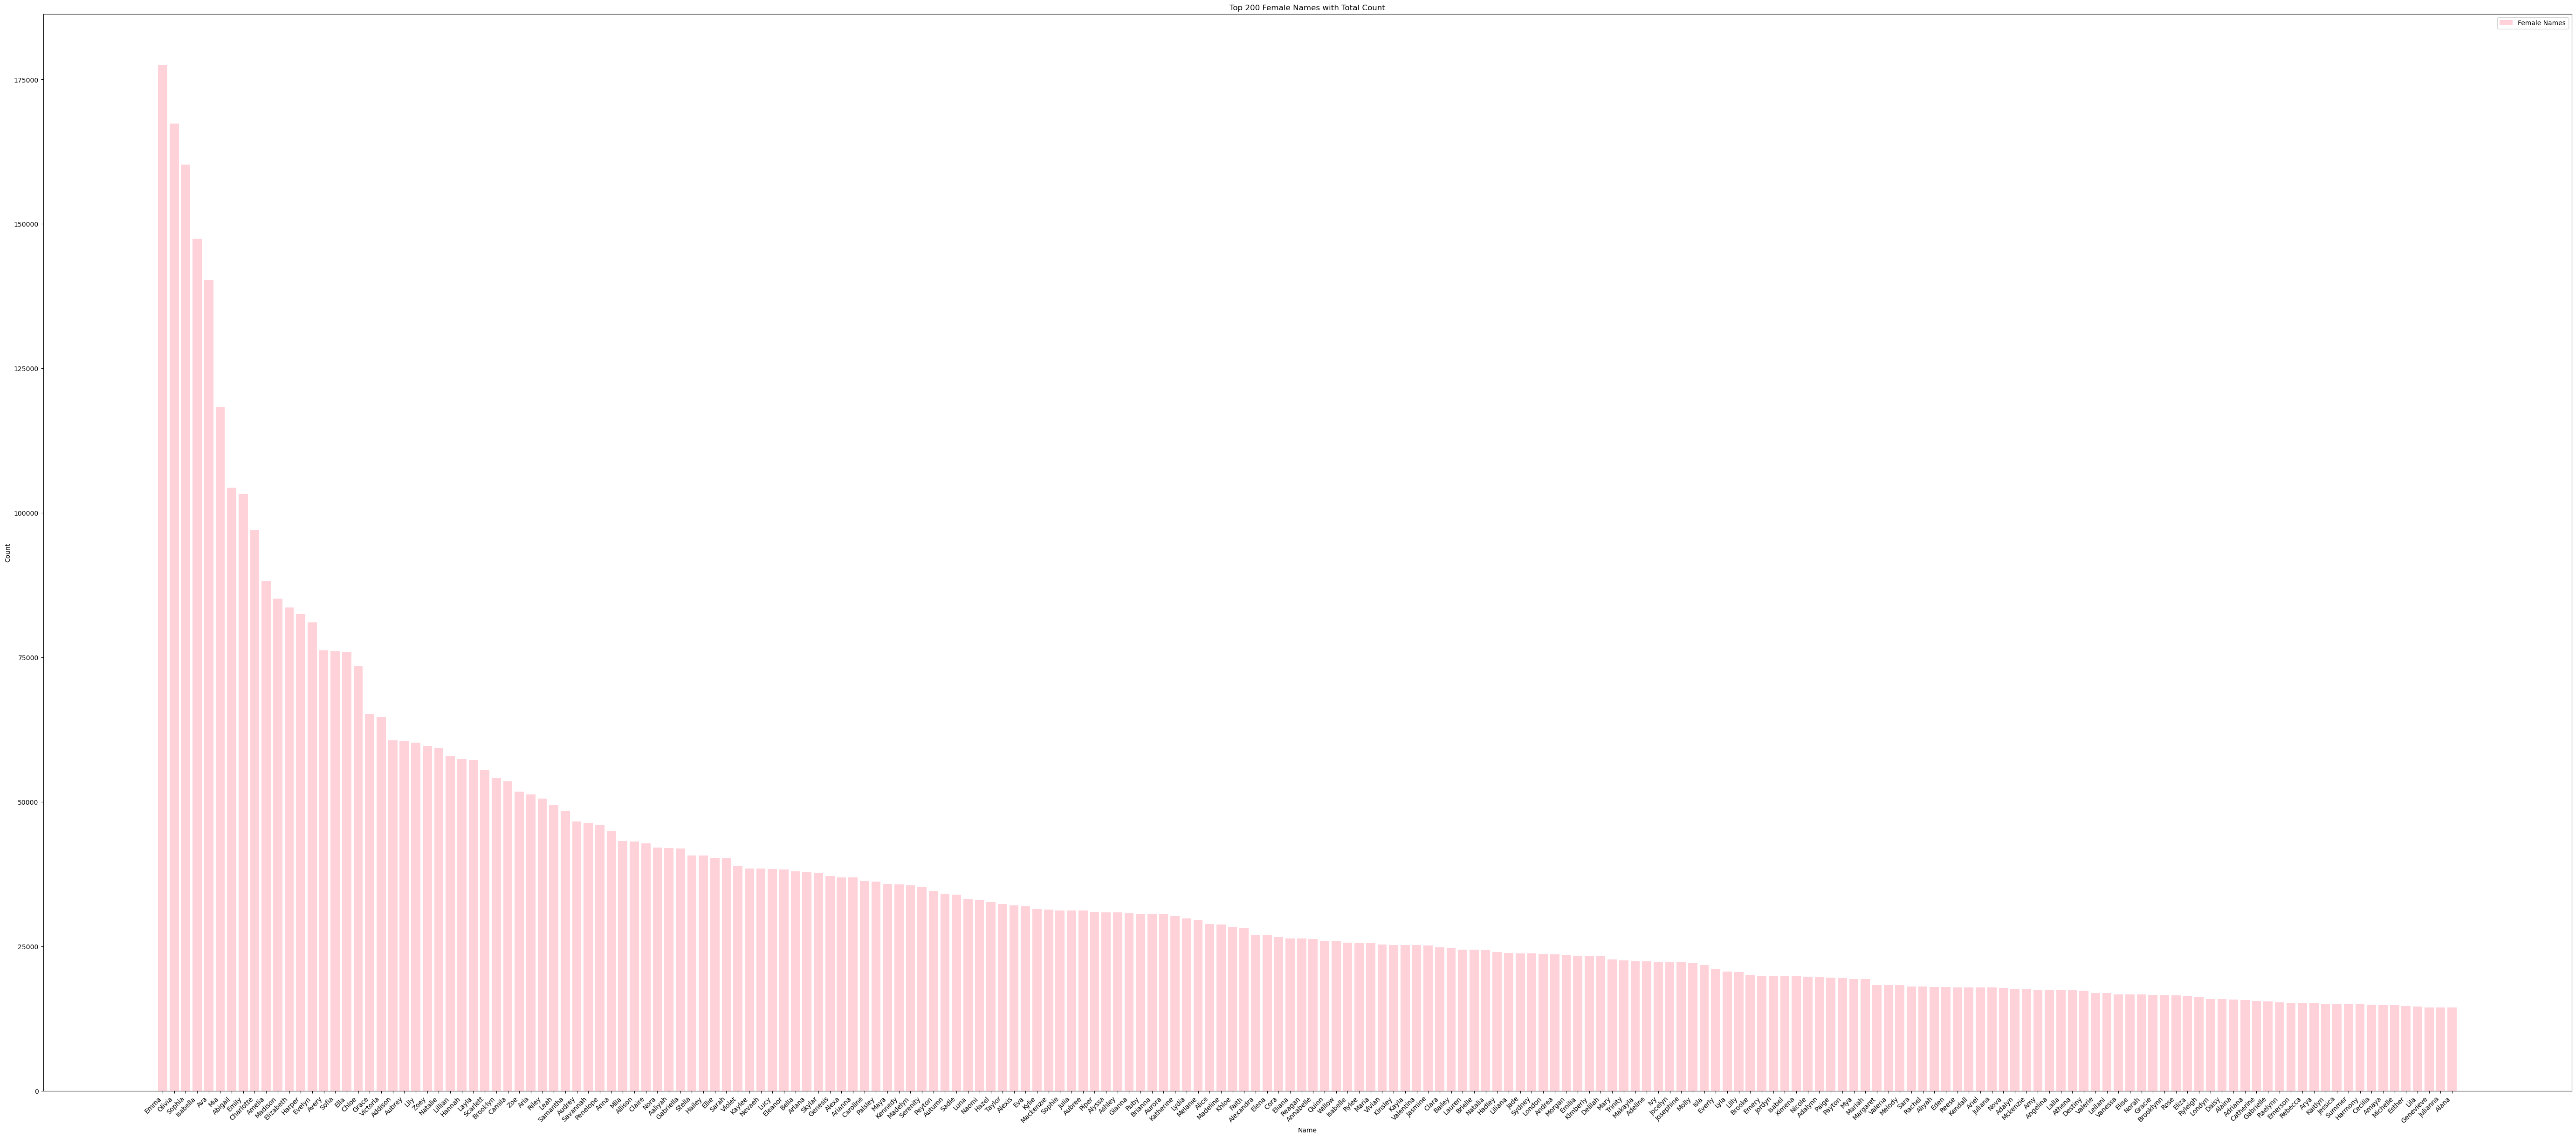

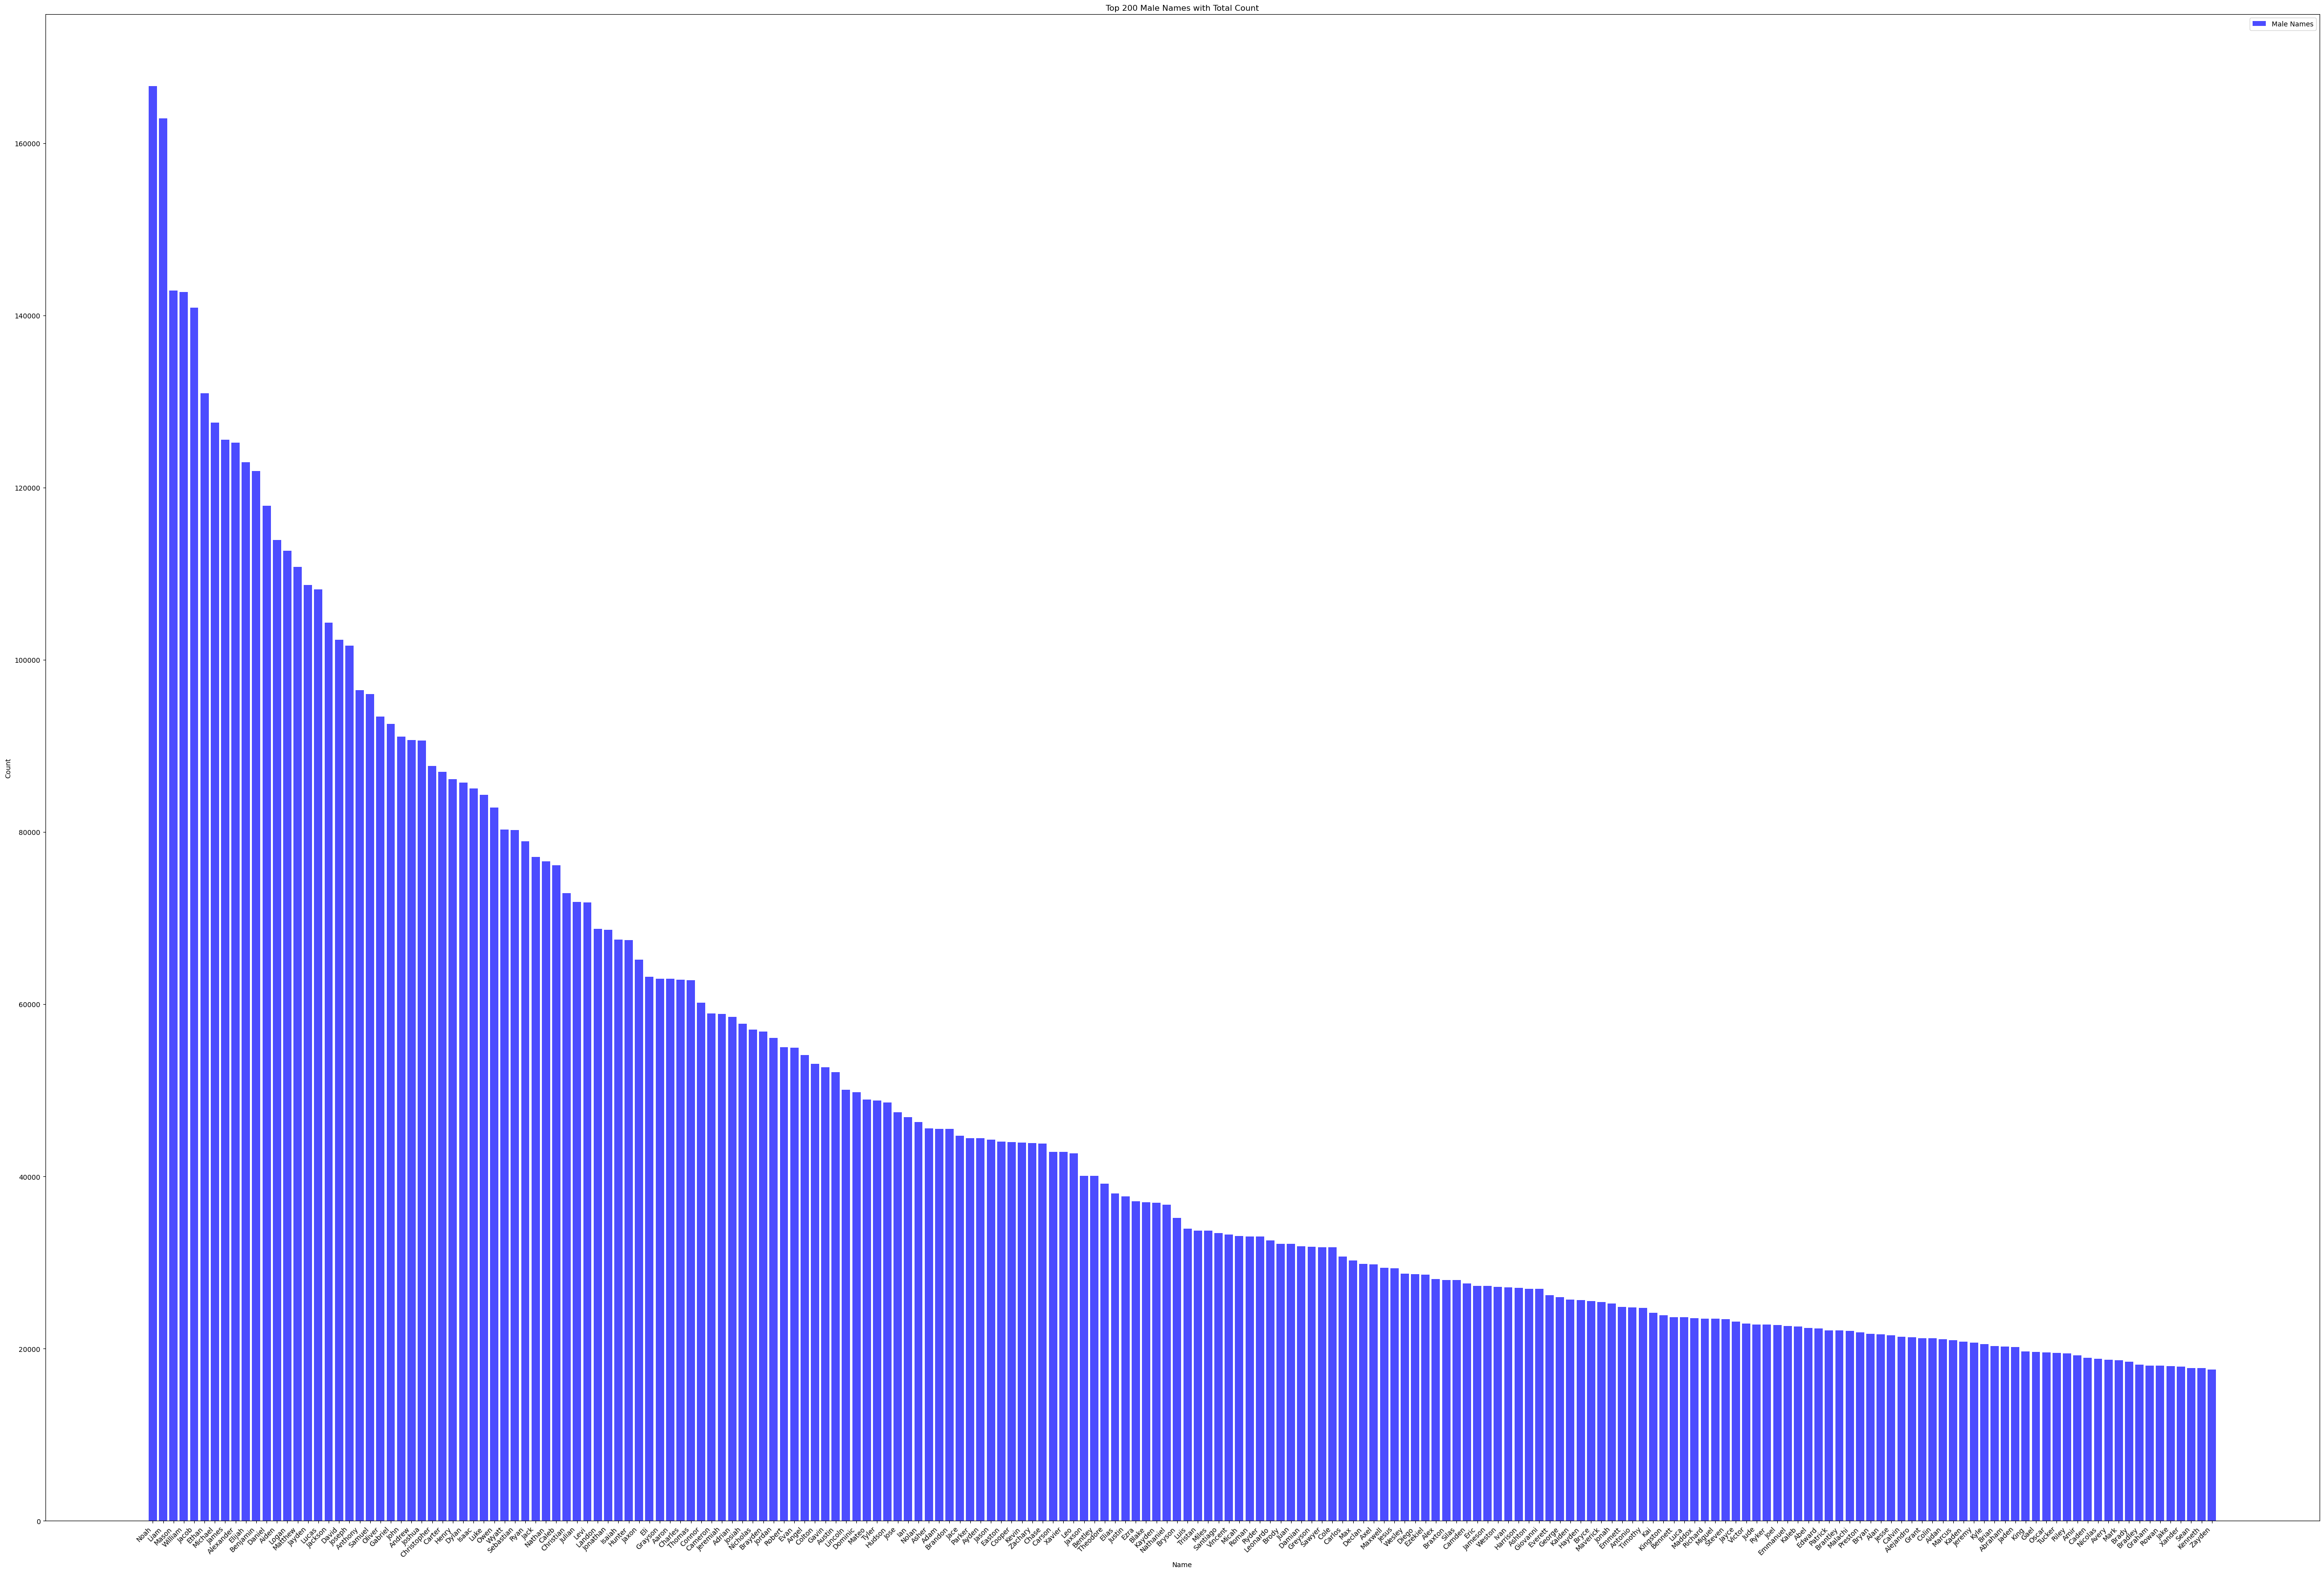

In [134]:
# Top 200 Female Names
plt.figure(figsize=(70, 30))
plt.bar(top_200_female_names.index, top_200_female_names, color='pink', alpha=0.7, label='Female Names')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 200 Female Names with Total Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Top 200 Male Names
plt.figure(figsize=(60, 40))
plt.bar(top_200_male_names.index, top_200_male_names, color='blue', alpha=0.7, label='Male Names')
plt.xlabel('Name')
plt.ylabel('Count')
plt.title('Top 200 Male Names with Total Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [46]:
# My new data import from a webside:
tables = pd.read_html(url)

In [47]:
df_url = tables[0]

In [53]:
print(df_url.head())

   Rank     Name  Number      Name  Number
0   1.0     Noah  183172      Emma  194917
1   2.0     Liam  173888    Olivia  184432
2   3.0    Jacob  163114    Sophia  181032
3   4.0  William  159833  Isabella  170417
4   5.0    Mason  157787       Ava  155761


In [57]:
df_url = df_url.drop('Rank', axis=1)  # clean colume "Rank"

In [135]:
print("Popular names of the period 2010s:")
print(df_url.head())

Popular names of the period 2010s:
      Name  Number      Name  Number
0     Noah  183172      Emma  194917
1     Liam  173888    Olivia  184432
2    Jacob  163114    Sophia  181032
3  William  159833  Isabella  170417
4    Mason  157787       Ava  155761


In [138]:
prefixes = ['Male_', 'Male_', 'Female_', 'Female_']

In [139]:
df_prefixed = df_url.copy()
df_prefixed.columns = [f"{prefix}{col}" for prefix, col in zip(prefixes, df_url.columns)]

In [140]:
df_male = df_prefixed[['Male_Name', 'Male_Number']]
df_female = df_prefixed[['Female_Name', 'Female_Number']]

Male name:


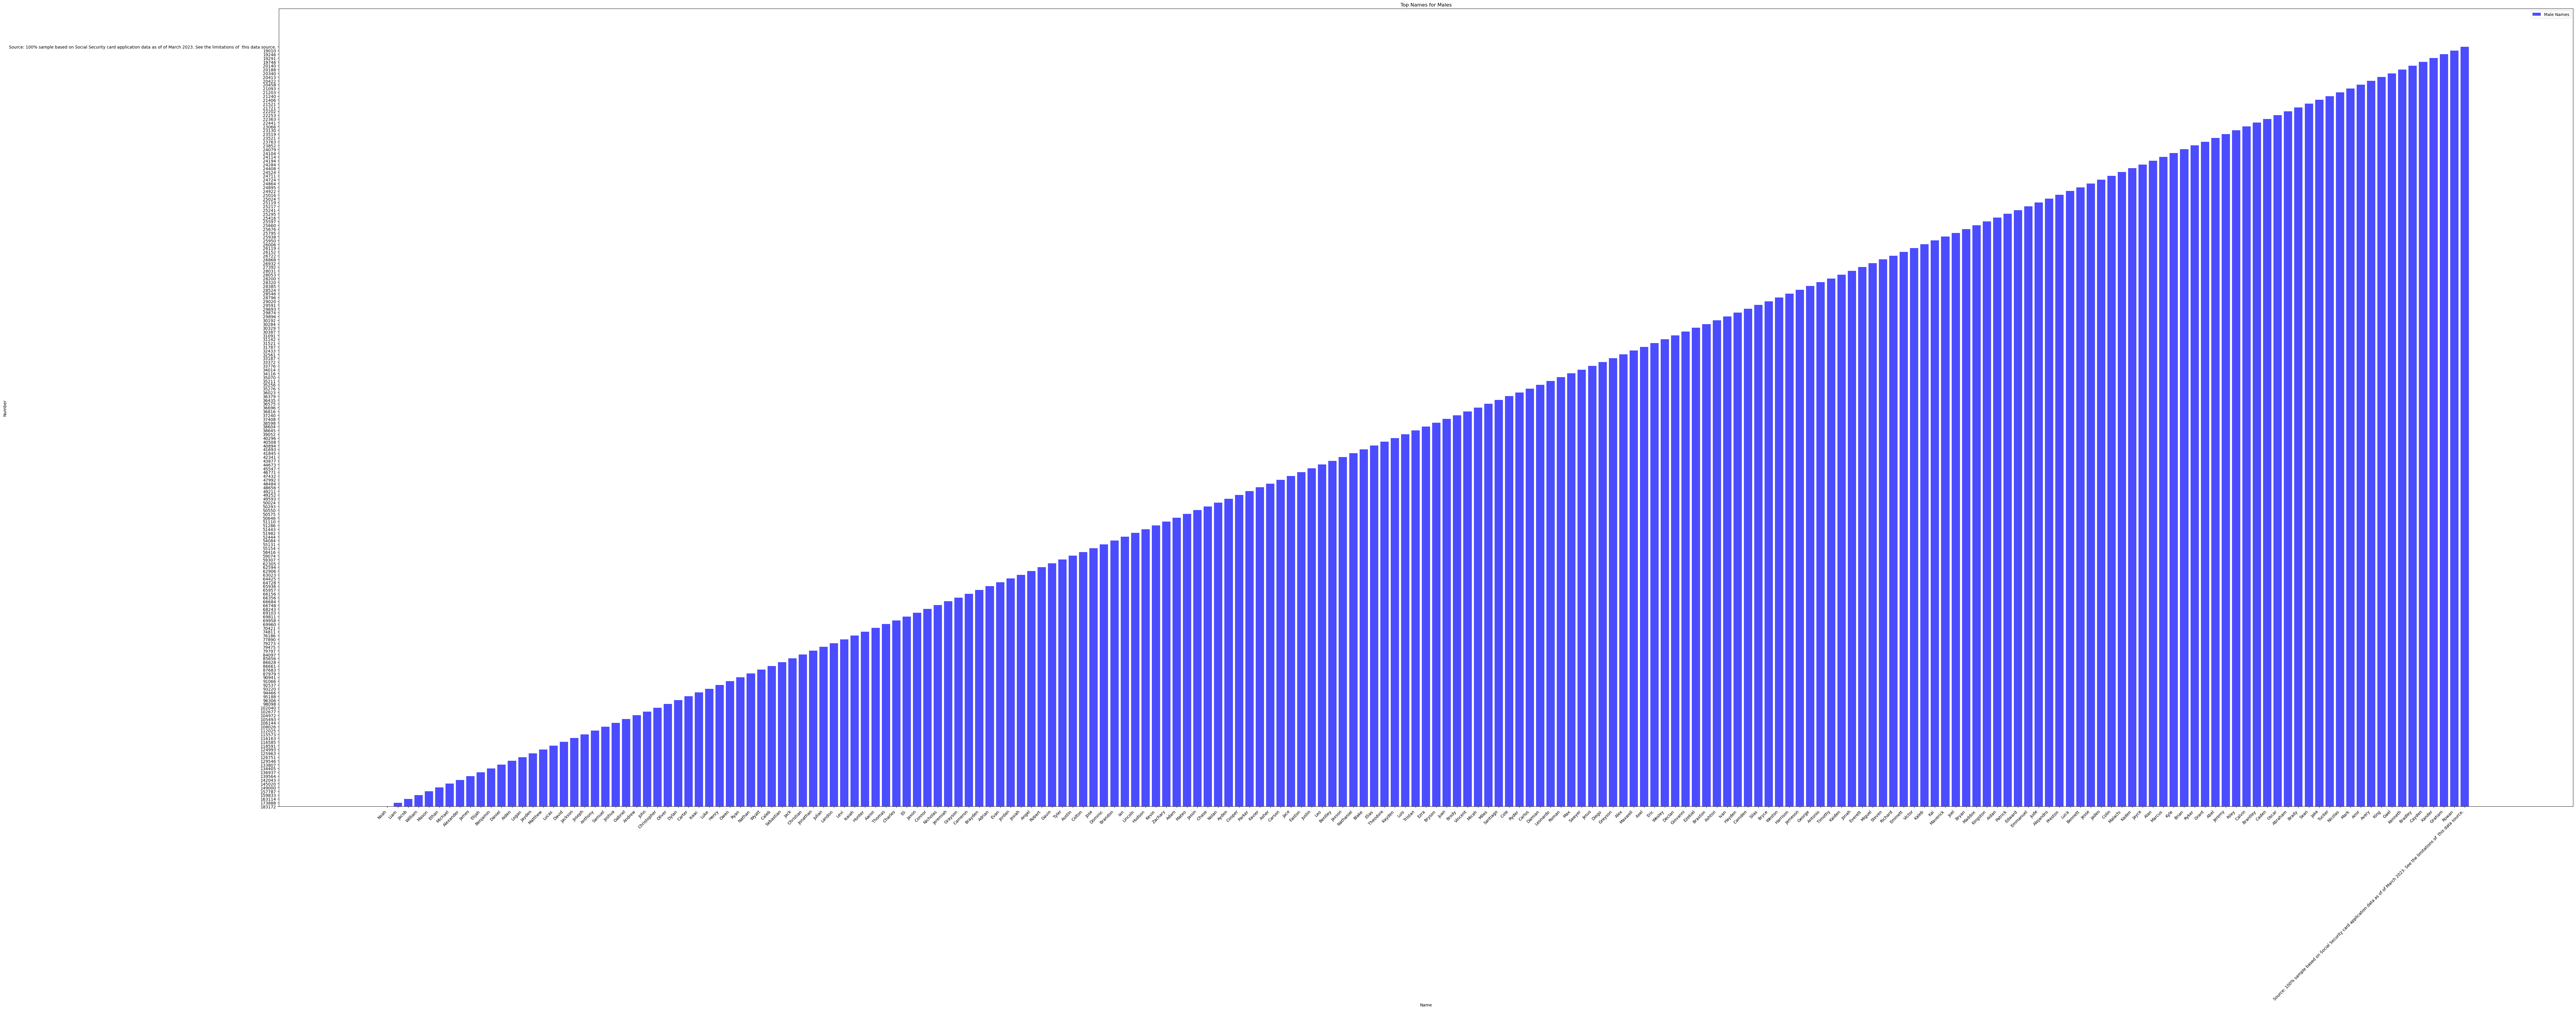

Female name:


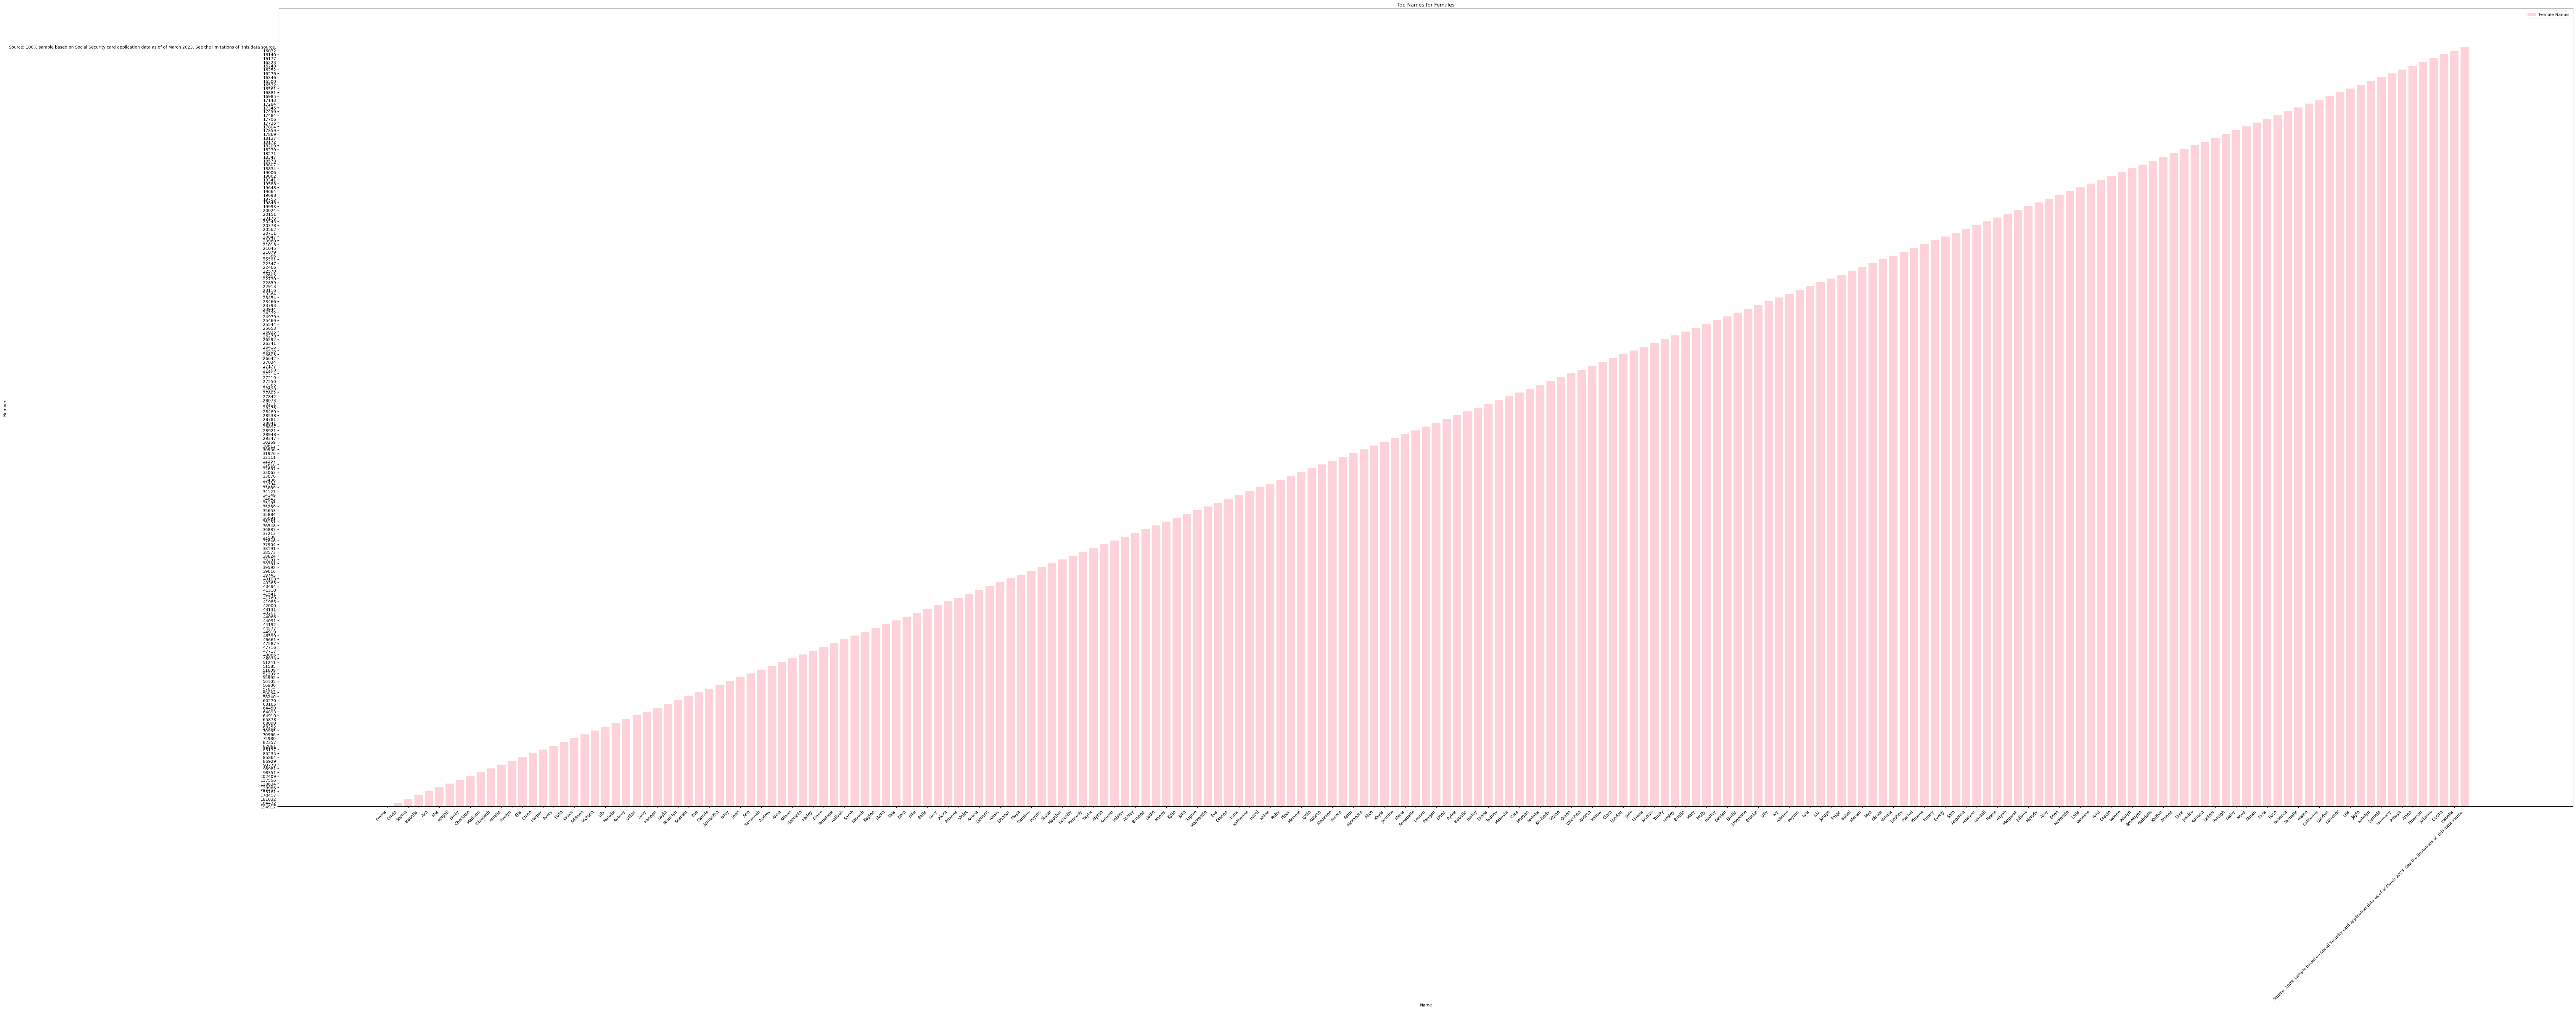

In [145]:
# Draw 2 diagrams: 
print("Male name:")
plt.figure(figsize=(100, 35))
plt.bar(df_male['Male_Name'], df_male['Male_Number'], color='blue', alpha=0.7, label='Male Names')
plt.xlabel('Name')
plt.ylabel('Number')
plt.title('Top Names for Males')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

print("Female name:")
plt.figure(figsize=(100, 35))
plt.bar(df_female['Female_Name'], df_female['Female_Number'], color='pink', alpha=0.7, label='Female Names')
plt.xlabel('Name')
plt.ylabel('Number')
plt.title('Top Names for Females')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [92]:
# My xml-file:
df_xml = pd.read_xml(xml_data)
print("My xml file seems empty")
print(df_xml)

My xml file seems empty
   row
0  NaN


In [93]:
# My json-file: 
print("my json file seems empty")
print(dfjson.head())

my json file seems empty
   0   1   2   3   4   5   6   7   8   9   10  11  12  13
0  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}
1  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}
2  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}
3  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}
4  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}  {}


In [98]:
# My PDF data:
df_pdf = tabula.read_pdf(pdf_path, pages='all')

In [99]:
print(df_pdf)

[                         Top 100 Baby Names for Boys
0              1. Noah 26. John 51. Charles 76. Jose
1              2. Liam 27. Carter 52. Connor 77. Ian
2            3. Mason 28. Luke 53. Cameron 78. Chase
3             4. Jacob 29. Dylan 54. Thomas 79. Adam
4   5. William 30. Christopher 55. Jordan 80. Hudson
5          6. Ethan 31. Isaac 56. Jeremiah 81. Nolan
6     7. Michael 32. Oliver 57. Nicholas 82. Zachary
7         8. Alexander 33. Henry 58. Evan 83. Easton
8        9. James 34. Sebastian 59. Adrian 84. Blake
9         10. Daniel  35. Caleb 60. Gavin 85. Jaxson
10         11. Elijah 36. Owen 61. Robert 86. Cooper
11     12. Benjamin 37. Ryan 62. Brayden 87. Lincoln
12       13. Logan 38. Nathan 63. Grayson 88. Xavier
13        14. Aiden 39. Wyatt 64. Josiah 89. Bentley
14       15. Jayden 40. Hunter 65. Colton 90. Kayden
15        16. Matthew 41. Jack 66. Austin 91. Carson
16     17. Jackson 42. Christian 67. Angel 92. Brody
17           18. David 43. Landon 68. Jace 93

In [104]:
df_split = df_pdf[0]['Top 100 Baby Names for Boys'].str.extractall(r'(\d+)\. (\w+)').reset_index()

In [107]:
df_split.columns = ['id', 'Real', 'Number', 'Name']

In [108]:
df_split['Number'] = df_split['Number'].astype(int)

In [110]:
df_sorted = df_split.sort_values(by=['Number', 'Real']).reset_index(drop=True)

In [111]:
print(df_sorted[['Number', 'Name']])

    Number     Name
0        1     Noah
1        2     Liam
2        3    Mason
3        4    Jacob
4        5  William
..     ...      ...
94      95    Ryder
95      96   Justin
96      97      Leo
97      98     Juan
98      99     Luis

[99 rows x 2 columns]


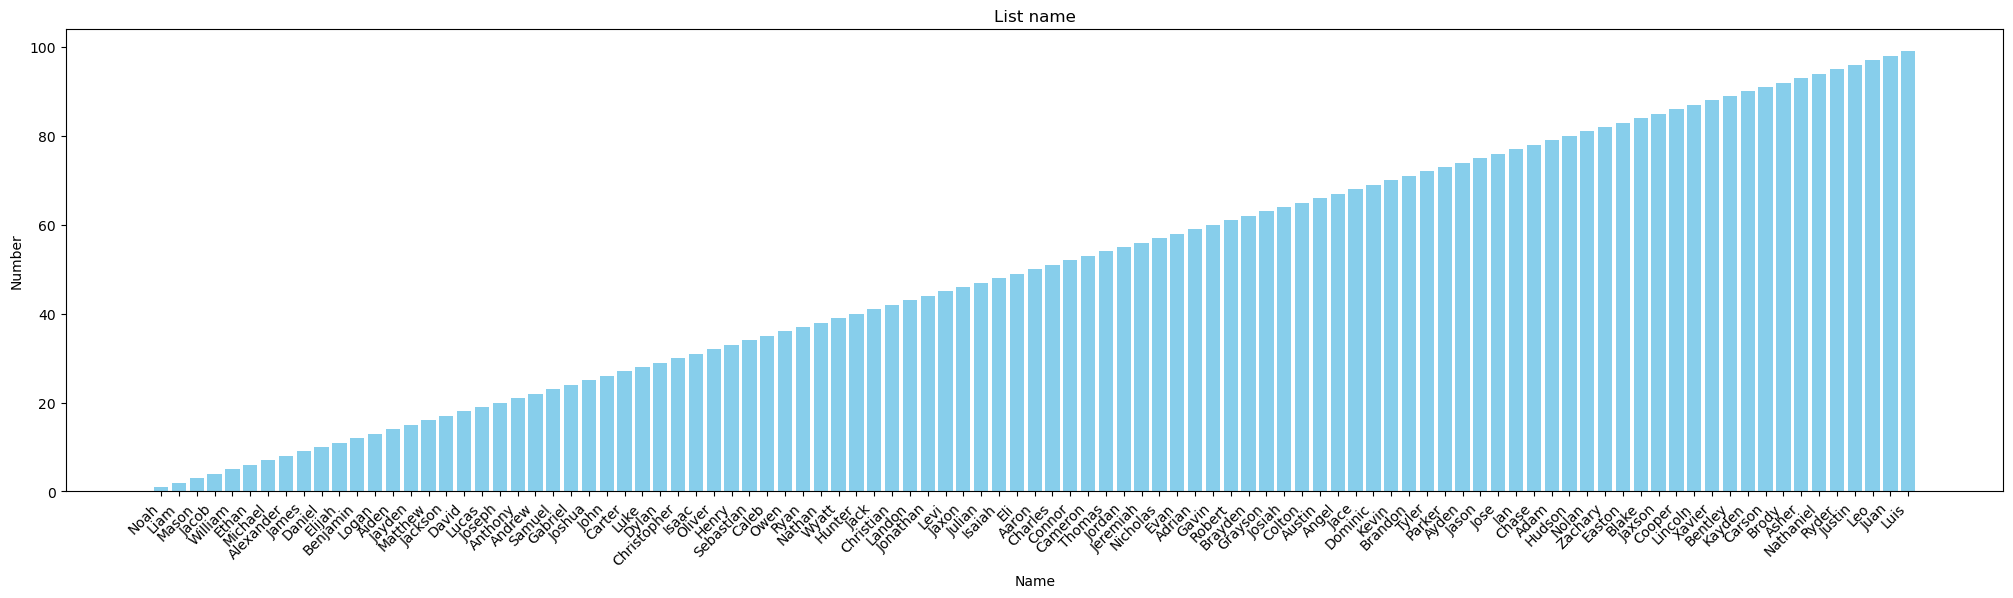

In [117]:
plt.figure(figsize=(25, 6))
plt.bar(df_sorted['Name'], df_sorted['Number'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Number')
plt.title('List name')
plt.xticks(rotation=45, ha='right')
plt.show()